## Project 1: Personal Finance Analysis

In this study, I wanted to investigate how major life events (and the COVID-19 pandemic) have affected my spending from 2017 to 2020. The following data was extracted from my Mint (Intuit) profile and includes all transactions that were made with by debit card, credit card, peer-to-peer transfer (e.g., Zelle), or check. It does not include cash transactions, cash gifts, or gift cards; however, since using a card or money transfer is the most popular method to complete transactions, this analysis should give an accurate estimation of how my spending patterns have changes over time.

Questions for this analysis:
1. How have the spending patterns changed due to a move?
2. How have the spending patterns changed due to a change in employment? 
3. How have the spending patterns changed due to marriage? 
4. How has the COVID-19 pandemic affected these spending patterns for the year 2020?

We are particularly interested in changes in food and travel expenses related to the COVID-19 pandemic.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
expenses = pd.read_csv('./totals/all_time_spending.csv')
expenses = expenses.drop(0)
# expenses.head(10)

# df.drop(df.head(n).index,inplace=True) # drop first n rows

expenses.drop(expenses.tail(2).index, inplace=True) # drop last n=2 rows
expenses

,Dates,Spending
1,January 2014,"$1,897.84"
2,February 2014,"$2,302.91"
3,March 2014,"$4,023.44"
4,April 2014,"$2,853.33"
5,May 2014,"$1,699.02"
...,...,...
80,August 2020,"$5,973.40"
81,September 2020,"$1,626.05"
82,October 2020,"$5,580.04"
83,November 2020,"$2,164.89"


In [3]:
x = "January 2017"
type(x)

y = x.split()

print(x)
print(y)

January 2017
['January', '2017']


In [4]:
# expenses.Spending[4]

# plt.plot(expenses['Dates'], expenses['Spending'], 'b.-')

# my_bins = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
# plt.hist(expenses['Spending'], bins=my_bins)
# plt.xticks(my_bins)

# plt.show()

In [5]:
type(expenses['Dates'][1])

str

In [6]:
new = expenses["Dates"].str.split(" ", n=1, expand=True)

# making separate Month column from new data frame 
expenses["Month"]= new[0] 
  
# making separate Year column from new data frame 
expenses["Year"]= new[1] 

expenses

,Dates,Spending,Month,Year
1,January 2014,"$1,897.84",January,2014
2,February 2014,"$2,302.91",February,2014
3,March 2014,"$4,023.44",March,2014
4,April 2014,"$2,853.33",April,2014
5,May 2014,"$1,699.02",May,2014
...,...,...,...,...
80,August 2020,"$5,973.40",August,2020
81,September 2020,"$1,626.05",September,2020
82,October 2020,"$5,580.04",October,2020
83,November 2020,"$2,164.89",November,2020


In [7]:
# expenses.describe()

In [8]:
# expenses.Amount = [float(x.lstrip('$')) if type(x) == str else x for x in expenses.Spending]
# expenses

temp = expenses.Spending.str.lstrip('$')
temp2 = temp.str.replace(',', '')
expenses['Amount'] = temp2
expenses

# temp2

# print(type(temp2[2]))
# x = float(temp2[3])
# print(x)
# print(type(x))

,Dates,Spending,Month,Year,Amount
1,January 2014,"$1,897.84",January,2014,1897.84
2,February 2014,"$2,302.91",February,2014,2302.91
3,March 2014,"$4,023.44",March,2014,4023.44
4,April 2014,"$2,853.33",April,2014,2853.33
5,May 2014,"$1,699.02",May,2014,1699.02
...,...,...,...,...,...
80,August 2020,"$5,973.40",August,2020,5973.40
81,September 2020,"$1,626.05",September,2020,1626.05
82,October 2020,"$5,580.04",October,2020,5580.04
83,November 2020,"$2,164.89",November,2020,2164.89


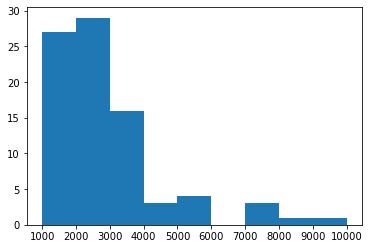

In [9]:
expenses['Amount'] = expenses['Amount'].astype(float)

# my_bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
my_bins = list(range(1000, 11000, 1000))

plt.hist(expenses['Amount'], bins=my_bins)
plt.xticks(my_bins)

plt.show()

In [10]:
df = expenses[['Month', 'Year', 'Amount']]
df.head(5)
df.describe()

,Amount
count,84.000000
mean,2929.641429
std,1661.329473
min,1192.480000
25%,1848.892500
50%,2570.320000
75%,3301.170000
max,9551.200000


In [11]:
df['Count'] = 1
df.head(5)

<ipython-input-11-ed67a2b00dce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Count'] = 1


,Month,Year,Amount,Count
1,January,2014,1897.84,1
2,February,2014,2302.91,1
3,March,2014,4023.44,1
4,April,2014,2853.33,1
5,May,2014,1699.02,1


In [12]:
# plt.boxplot([df.Amount])
# plt.show()

In [13]:
df.to_csv('./totals/all_data_mod.csv', index=False)

In [14]:
df.groupby(['Year']).count()['Count']

Year
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2020    12
Name: Count, dtype: int64

In [15]:
df.groupby(['Year']).mean()['Amount']

Year
2014    2432.899167
2015    2413.317500
2016    2249.960833
2017    2242.847500
2018    2891.016667
2019    4086.055000
2020    4191.393333
Name: Amount, dtype: float64

In [16]:
amax = df.groupby(['Year']).max()['Amount']
# new_data['MaxVal'] = amax

amax


Year
2014    4023.44
2015    8126.01
2016    7014.89
2017    3725.14
2018    3709.38
2019    9551.20
2020    7893.29
Name: Amount, dtype: float64

In [17]:
df.groupby(['Year']).min()['Amount']

Year
2014    1681.59
2015    1192.48
2016    1231.79
2017    1348.76
2018    2099.40
2019    1627.88
2020    1626.05
Name: Amount, dtype: float64

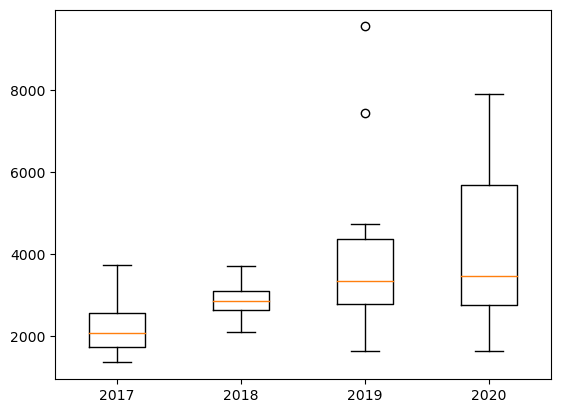

In [19]:
all_2017 = df.loc[df.Year == '2017']['Amount']
all_2018 = df.loc[df.Year == '2018']['Amount']
all_2019 = df.loc[df.Year == '2019']['Amount']
all_2020 = df.loc[df.Year == '2020']['Amount']

box_labels = ['2017', '2018', '2019', '2020']
plt.style.use('default')
boxes = plt.boxplot([all_2017, all_2018, all_2019, all_2020], labels=box_labels)
plt.show()

In [20]:
df

,Month,Year,Amount,Count
1,January,2014,1897.84,1
2,February,2014,2302.91,1
3,March,2014,4023.44,1
4,April,2014,2853.33,1
5,May,2014,1699.02,1
...,...,...,...,...
80,August,2020,5973.40,1
81,September,2020,1626.05,1
82,October,2020,5580.04,1
83,November,2020,2164.89,1


In [21]:
import seaborn as sns
sns.set()

In [23]:
x = df['Month'] + ' ' + df['Year']
x

1       January 2014
2      February 2014
3         March 2014
4         April 2014
5           May 2014
           ...      
80       August 2020
81    September 2020
82      October 2020
83     November 2020
84     December 2020
Length: 84, dtype: object

In [24]:
df['x'] = x
df

,Month,Year,Amount,Count,x
1,January,2014,1897.84,1,January 2014
2,February,2014,2302.91,1,February 2014
3,March,2014,4023.44,1,March 2014
4,April,2014,2853.33,1,April 2014
5,May,2014,1699.02,1,May 2014
...,...,...,...,...,...
80,August,2020,5973.40,1,August 2020
81,September,2020,1626.05,1,September 2020
82,October,2020,5580.04,1,October 2020
83,November,2020,2164.89,1,November 2020


In [29]:
x = np.arange(0, len(df))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

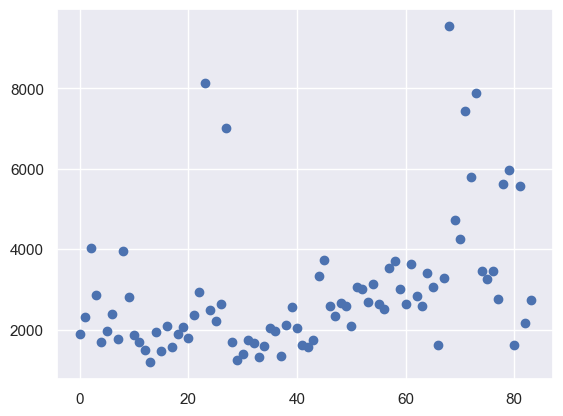

In [31]:
plt.scatter(x, df['Amount']);

In [36]:
df = df.drop(['Count', 'x'], axis=1)
df

,Month,Year,Amount
1,January,2014,1897.84
2,February,2014,2302.91
3,March,2014,4023.44
4,April,2014,2853.33
5,May,2014,1699.02
...,...,...,...
80,August,2020,5973.40
81,September,2020,1626.05
82,October,2020,5580.04
83,November,2020,2164.89


In [40]:
df20 = df[df['Year'] == '2020']

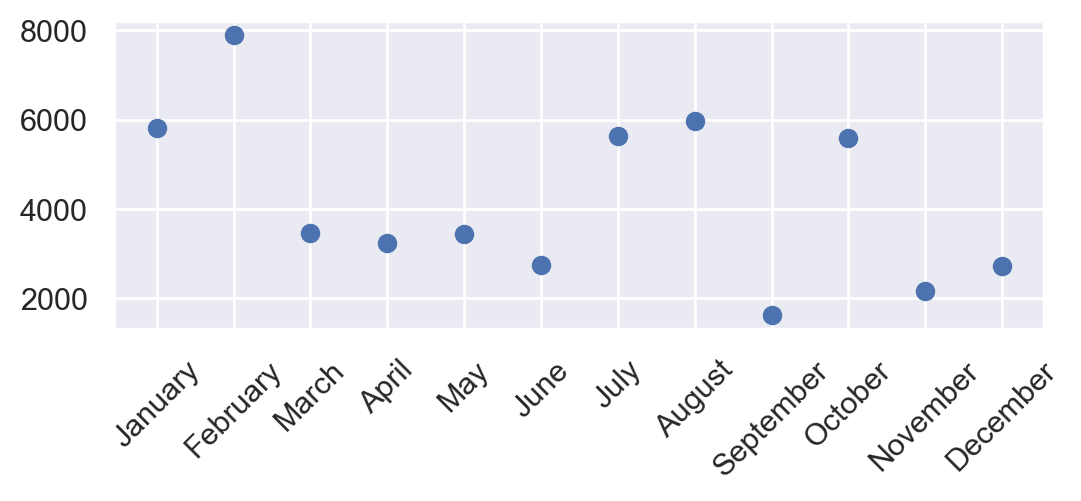

In [43]:
plt.figure(figsize=(6,2), dpi=200)
plt.scatter(df20['Month'], df20['Amount'])
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.show()

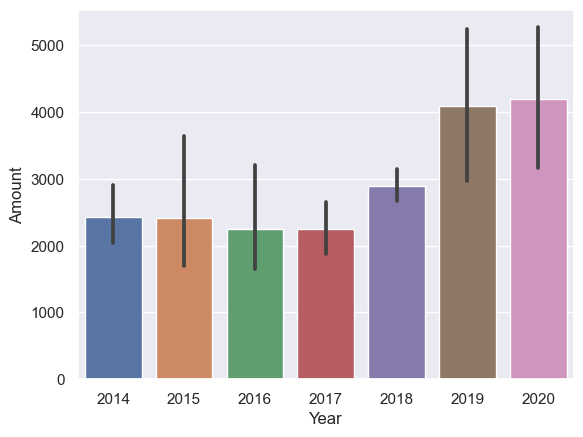

In [47]:
sns.barplot(data=df, x='Year', y='Amount');

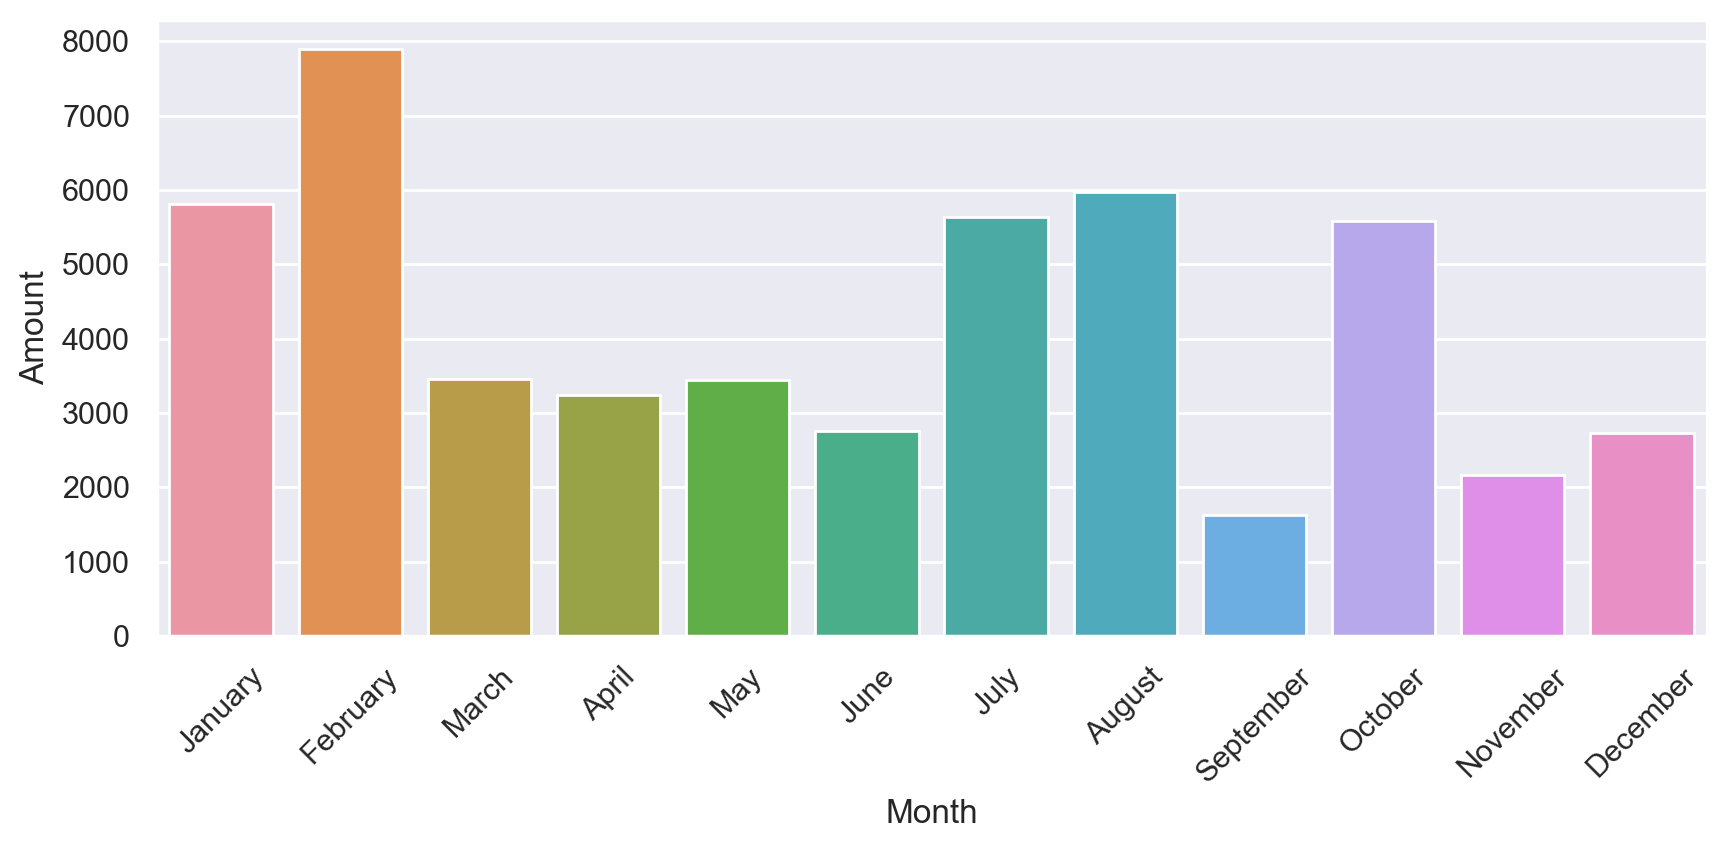

In [50]:
plt.figure(figsize=(10,4), dpi=200)
sns.barplot(data=df20, x='Month', y='Amount')
plt.xticks(rotation=45)

plt.show()

In [53]:
df2 = df[df['Year'] >= '2018']
df2

,Month,Year,Amount
49,January,2018,2655.72
50,February,2018,2596.78
51,March,2018,2099.40
52,April,2018,3062.39
53,May,2018,3017.46
54,June,2018,2693.06
55,July,2018,3144.53
56,August,2018,2643.12
57,September,2018,2520.80
58,October,2018,3536.29


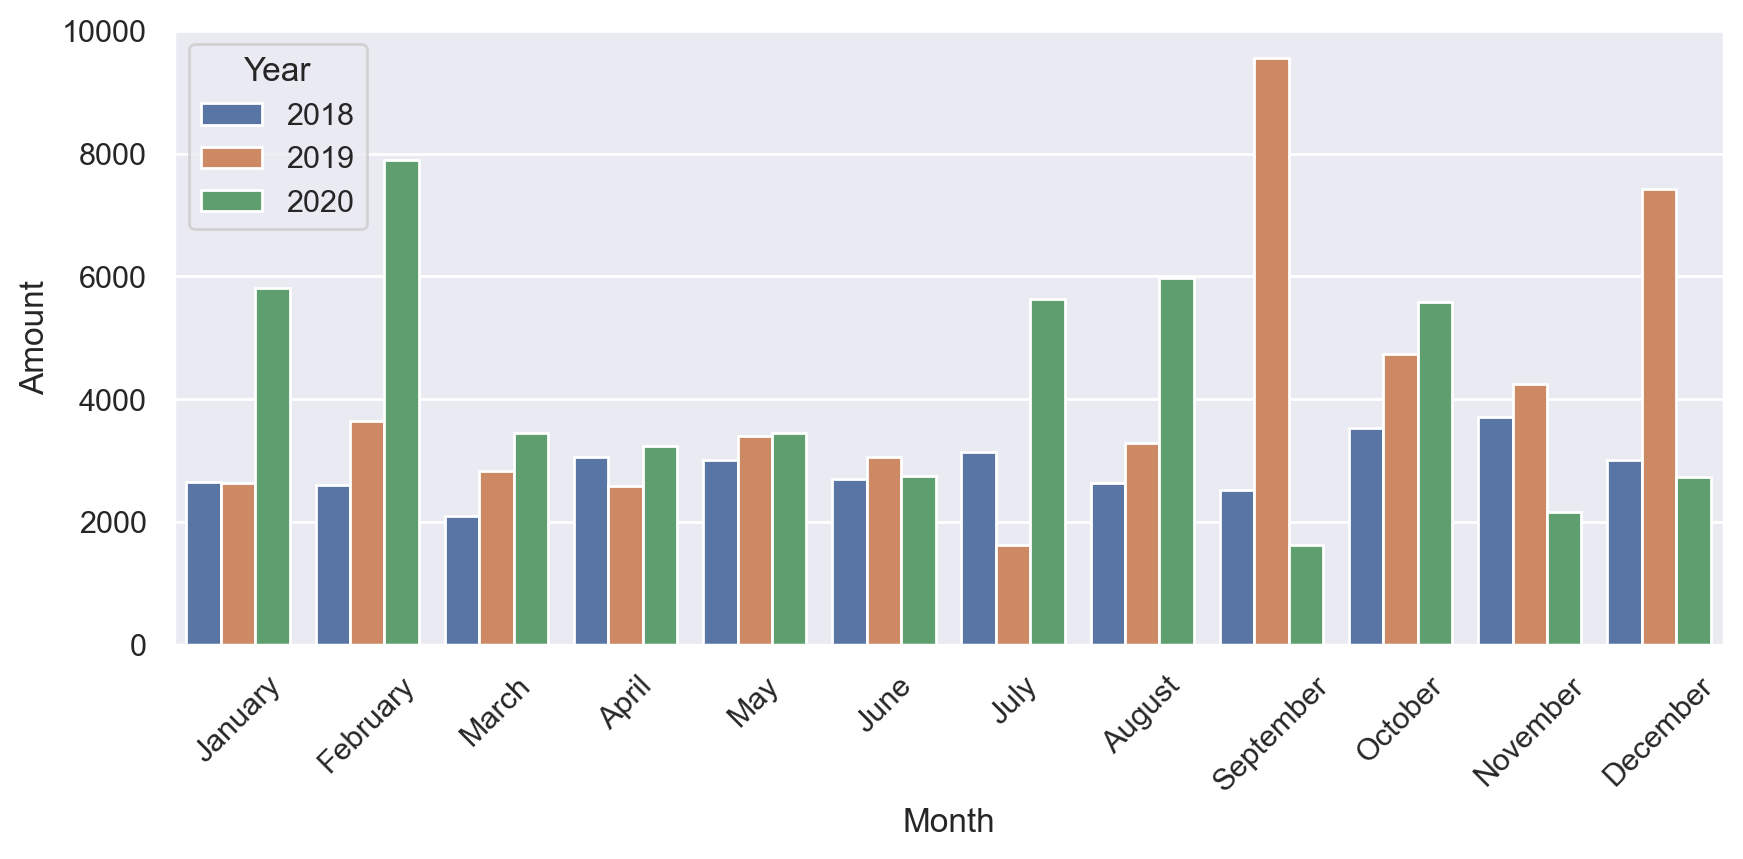

In [54]:
plt.figure(figsize=(10,4), dpi=200)
sns.barplot(data=df2, x='Month', y='Amount', hue='Year')
plt.xticks(rotation=45)

plt.show()

In [55]:
air = pd.read_csv('./categories/air_travel.csv')
air

,Dates,Spending
0,December 2013,$29.00
1,January 2014,$0.00
2,February 2014,$745.00
3,March 2014,"$1,925.00"
4,April 2014,$60.00
...,...,...
82,October 2020,$193.63
83,November 2020,$0.00
84,December 2020,$31.15
85,January 2021,$274.05


In [56]:
air.drop(air.tail(1).index, inplace=True)  # drop last n rows
air

,Dates,Spending
0,December 2013,$29.00
1,January 2014,$0.00
2,February 2014,$745.00
3,March 2014,"$1,925.00"
4,April 2014,$60.00
...,...,...
81,September 2020,$261.69
82,October 2020,$193.63
83,November 2020,$0.00
84,December 2020,$31.15


In [65]:
temp = air["Dates"].str.split(" ", n=1, expand=True)

# making separate Month column from new data frame 
air["Month"]= temp[0] 
  
# making separate Year column from new data frame 
air["Year"]= temp[1]

In [70]:
air['Spending'] = air['Spending'].str.strip('$')
air['Spending'] = air['Spending'].str.replace(',', '')
air

,Dates,Spending,Month,Year
0,December 2013,29.00,December,2013
1,January 2014,0.00,January,2014
2,February 2014,745.00,February,2014
3,March 2014,1925.00,March,2014
4,April 2014,60.00,April,2014
...,...,...,...,...
81,September 2020,261.69,September,2020
82,October 2020,193.63,October,2020
83,November 2020,0.00,November,2020
84,December 2020,31.15,December,2020


In [71]:
air['Spending'] = air['Spending'].astype(float)
air

,Dates,Spending,Month,Year
0,December 2013,29.00,December,2013
1,January 2014,0.00,January,2014
2,February 2014,745.00,February,2014
3,March 2014,1925.00,March,2014
4,April 2014,60.00,April,2014
...,...,...,...,...
81,September 2020,261.69,September,2020
82,October 2020,193.63,October,2020
83,November 2020,0.00,November,2020
84,December 2020,31.15,December,2020


In [76]:
air3 = air[ (air['Year'] > '2017') & (air['Year'] <= '2020') ]
air3

,Dates,Spending,Month,Year
49,January 2018,0.00,January,2018
50,February 2018,0.00,February,2018
51,March 2018,0.00,March,2018
52,April 2018,0.00,April,2018
53,May 2018,0.00,May,2018
54,June 2018,0.00,June,2018
55,July 2018,289.36,July,2018
56,August 2018,0.00,August,2018
57,September 2018,0.00,September,2018
58,October 2018,0.00,October,2018


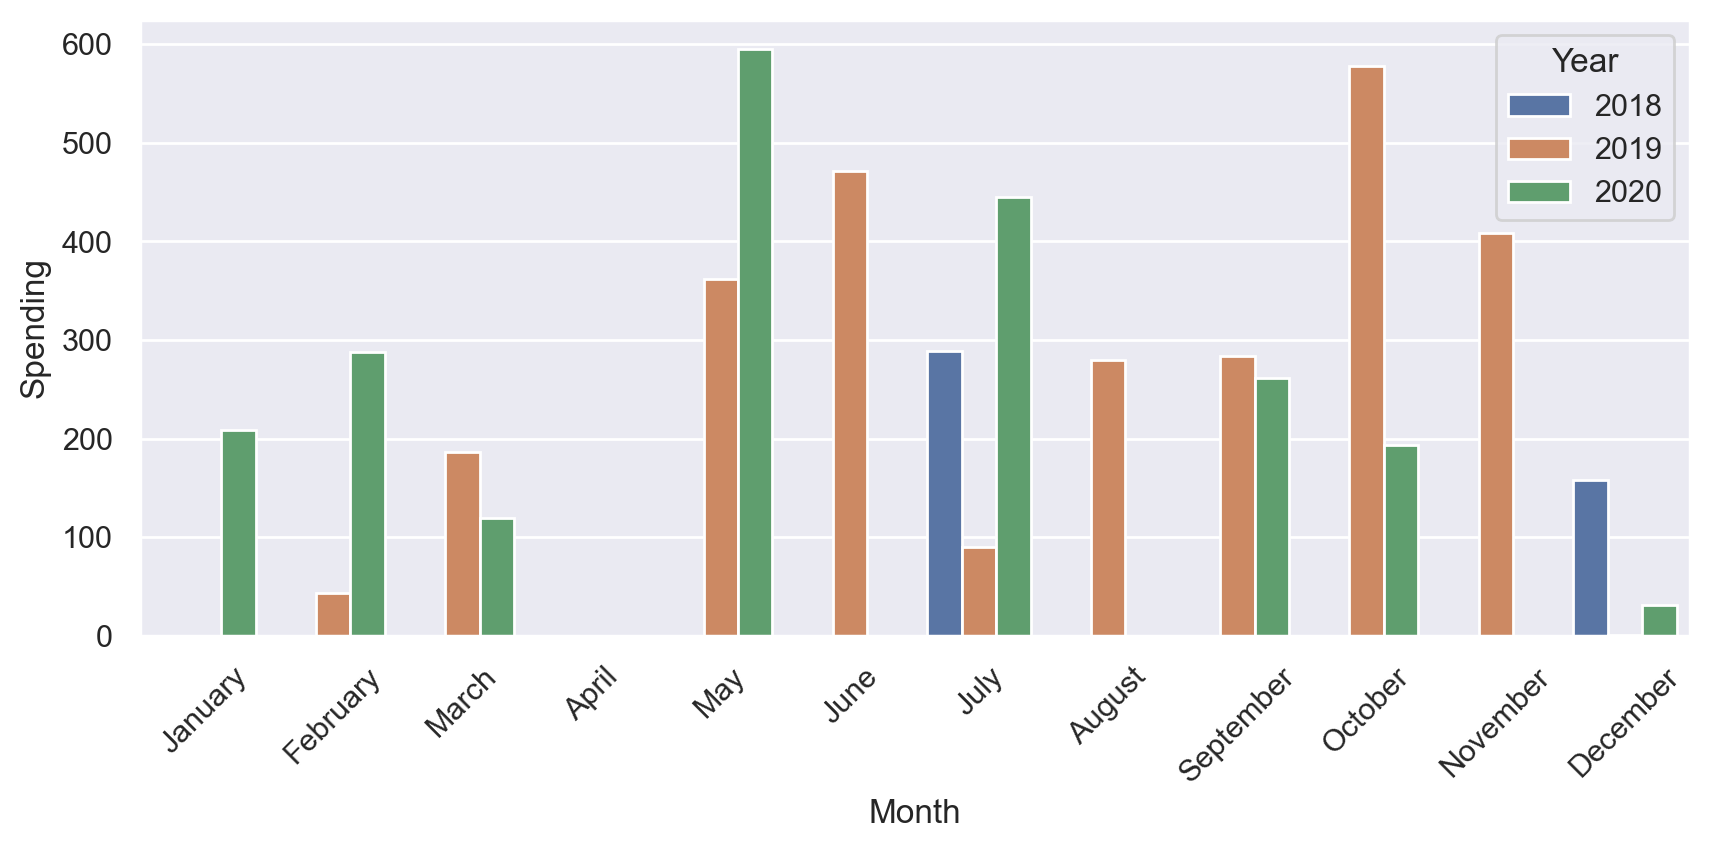

In [77]:
plt.figure(figsize=(10,4), dpi=200)
sns.barplot(data=air3, x='Month', y='Spending', hue='Year')
plt.xticks(rotation=45)

plt.show()

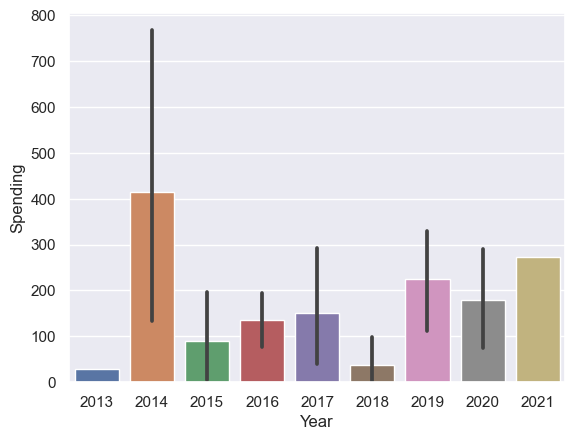

In [79]:
sns.barplot(data=air, x='Year', y='Spending');